

# 금 시세 예측(USD)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)

#### 전처리 작업
* 이승현 
1. CIP 역사적 자료
2. 은 선물 내역
3. 러셀 2000 지수
4. CBOE volatillity index 내역

* 이수빈
1. 러셀 2000
2. 나스닥 종합지수
3. S&P 500 내역
4. 다우존스 지수 내역


## 캐글 금 시세 데이터 불러오기
* 자료 : 캐글 = https://www.kaggle.com/datasets/odins0n/monthly-gold-prices

In [2]:
# 금 데이터 파일 로드
gold_df = pd.read_csv("1979-2021.csv")
gold_df

,Date,United States(USD),Europe(EUR),Japan(JPY),United Kingdom(GBP),Canada(CAD),Switzerland(CHF),India(INR),China(CNY),Turkey(TRY),Saudi Arabia(SAR),Indonesia(IDR),United Arab Emirates(AED),Thailand(THB),Vietnam(VND),Egypt(EGP),South Korean(KRW),Australia(AUD),South Africa(ZAR)
0,31-01-1979,233.7,144.8,45160.3,117.4,267.1,379.3,1840.8,NaN,NaN,745.2,139739.3,856.1,4511.3,NaN,NaN,108235.8,197.2,194.5
1,28-02-1979,251.3,154.6,50209.1,124.2,295.5,413.6,2011.7,NaN,NaN,827.8,154683.1,946.6,4985.7,NaN,NaN,119929.3,219.6,209.4
2,30-03-1979,240.1,148.0,50274.3,116.2,278.2,406.2,1940.2,NaN,NaN,796.7,148844.2,910.4,4812.9,NaN,NaN,116123.6,214.6,202.4
3,30-04-1979,245.3,152.8,54144.6,118.8,278.5,420.0,2013.1,NaN,NaN,819.4,152453.6,930.2,4891.0,NaN,NaN,117423.3,221.1,206.9
4,31-05-1979,274.6,172.0,61057.1,132.7,321.6,478.0,2253.4,NaN,NaN,933.3,171656.1,1048.4,5560.8,NaN,NaN,133889.6,250.7,233.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,31-03-2021,1691.1,1438.8,186861.0,1225.7,2125.4,1591.5,123639.0,11084.8,13995.6,6342.1,24562502.0,6211.5,52845.3,39020979.9,26579.1,1913845.9,2220.3,24970.5
507,30-04-2021,1767.7,1468.4,193213.0,1276.7,2174.6,1612.2,130934.3,11439.4,14657.4,6628.9,25533702.8,6492.8,55040.2,40753168.5,27681.4,1966245.4,2288.4,25644.2
508,31-05-2021,1900.0,1554.0,207845.0,1336.6,2295.3,1708.7,137979.1,12084.8,16105.4,7125.4,27131285.3,6978.3,59344.9,43786246.6,29772.2,2110939.4,2454.6,26067.3
509,30-06-2021,1763.2,1486.8,195692.0,1276.3,2183.3,1629.8,131054.9,11392.5,15317.4,6612.5,25565673.6,6476.3,56509.0,40580658.2,27672.6,1985571.3,2348.5,25175.6


In [3]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       511 non-null    object 
 1   United States(USD)         511 non-null    float64
 2   Europe(EUR)                511 non-null    float64
 3   Japan(JPY)                 511 non-null    float64
 4   United Kingdom(GBP)        511 non-null    float64
 5   Canada(CAD)                511 non-null    float64
 6   Switzerland(CHF)           511 non-null    float64
 7   India(INR)                 511 non-null    float64
 8   China(CNY)                 439 non-null    float64
 9   Turkey(TRY)                464 non-null    float64
 10  Saudi Arabia(SAR)          511 non-null    float64
 11  Indonesia(IDR)             511 non-null    float64
 12  United Arab Emirates(AED)  511 non-null    float64
 13  Thailand(THB)              511 non-null    float64

In [4]:
# 필요한 칼럼만 사용 할 예정 (연도 ,USD 시세)

In [5]:
gold_df = gold_df.drop(gold_df.columns[range(2,19)], axis=1)
gold_df

,Date,United States(USD)
0,31-01-1979,233.7
1,28-02-1979,251.3
2,30-03-1979,240.1
3,30-04-1979,245.3
4,31-05-1979,274.6
...,...,...
506,31-03-2021,1691.1
507,30-04-2021,1767.7
508,31-05-2021,1900.0
509,30-06-2021,1763.2


- 2010년 1월 데이터 부터 사용 할 예정
- 2010년 이전 데이터 제거

In [6]:
# 372 인댁스 이전 삭제
gold_df.iloc[370:390]

,Date,United States(USD)
370,30-11-2009,1175.8
371,31-12-2009,1087.5
372,29-01-2010,1078.5
373,26-02-2010,1108.3
374,31-03-2010,1115.5
375,30-04-2010,1179.3
376,31-05-2010,1207.5
377,30-06-2010,1244.0
378,30-07-2010,1169.0
379,31-08-2010,1246.0


In [7]:
gold_df = gold_df.drop(gold_df.index[:372], axis = 0)

In [8]:
gold_df.tail

<bound method NDFrame.tail of            Date  United States(USD)
372  29-01-2010              1078.5
373  26-02-2010              1108.3
374  31-03-2010              1115.5
375  30-04-2010              1179.3
376  31-05-2010              1207.5
..          ...                 ...
506  31-03-2021              1691.1
507  30-04-2021              1767.7
508  31-05-2021              1900.0
509  30-06-2021              1763.2
510  30-07-2021              1825.8

[139 rows x 2 columns]>

In [9]:
gold_df = gold_df.reset_index(drop=True)
gold_df

,Date,United States(USD)
0,29-01-2010,1078.5
1,26-02-2010,1108.3
2,31-03-2010,1115.5
3,30-04-2010,1179.3
4,31-05-2010,1207.5
...,...,...
134,31-03-2021,1691.1
135,30-04-2021,1767.7
136,31-05-2021,1900.0
137,30-06-2021,1763.2


### 뉴옥 CPI 지수 ( 소비자 물가지수)
* 출처 = https://kr.investing.com/etfs/iq-cpi-inflation-hedged-historical-data![image.png](attachment:image.png)

In [10]:
NYC_CPI = pd.read_csv("CPI 역사적 자료.csv")

In [11]:
NYC_CPI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      152 non-null    object 
 1   종가      152 non-null    float64
 2   오픈      152 non-null    float64
 3   고가      152 non-null    float64
 4   저가      152 non-null    float64
 5   거래량     152 non-null    object 
 6   변동 %    152 non-null    object 
dtypes: float64(4), object(3)
memory usage: 8.4+ KB


* 날짜를 시간 순으로 재정렬

In [12]:
r_idx = [i for i in range(NYC_CPI.shape[0]-1, -1, -1)]
NYC_CPI = pd.DataFrame(NYC_CPI, index=r_idx)

In [13]:
NYC_CPI = NYC_CPI.reset_index(drop=True)

In [14]:
NYC_CPI = NYC_CPI.drop(NYC_CPI.columns[range(2,7)], axis = 1)

In [15]:
# 기존 금 데이터가 21년 7월 까지만 있으므로 그 이후 데이터 삭제
NYC_CPI = NYC_CPI.drop(NYC_CPI.index[139:], axis = 0)

In [16]:
NYC_CPI.rename(columns = {"종가":"NYC_CPI"}, inplace=True)

In [17]:
NYC_CPI = NYC_CPI.pop("NYC_CPI")

In [18]:
NYC_CPI

0      25.05
1      25.03
2      24.97
3      24.94
4      25.09
       ...  
134    27.13
135    27.30
136    27.36
137    27.40
138    27.51
Name: NYC_CPI, Length: 139, dtype: float64

### 러셀 2000지수 
* 출처 - https://kr.investing.com/indices/smallcap-2000-historical-data![image.png](attachment:image.png)

In [19]:
RUT = pd.read_csv("러셀 2000 지수 내역.csv")
RUT

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2022년 8월 01일,"1,941.21","1,866.60","1,959.13","1,850.40",NaN,2.85%
1,2022년 7월 01일,"1,887.37","1,700.00","1,887.37","1,677.10",NaN,10.50%
2,2022년 6월 01일,"1,707.99","1,871.46","1,919.73","1,641.47",NaN,-8.37%
3,2022년 5월 01일,"1,864.04","1,863.66","1,952.75","1,701.15",NaN,0.00%
4,2022년 4월 01일,"1,864.10","2,071.22","2,103.36","1,860.58",NaN,-9.95%
...,...,...,...,...,...,...,...
147,2010년 5월 01일,661.61,719.30,732.87,617.61,NaN,-7.67%
148,2010년 4월 01일,716.60,681.57,745.95,677.75,NaN,5.59%
149,2010년 3월 01일,678.64,630.61,693.32,630.61,NaN,7.97%
150,2010년 2월 01일,628.56,602.22,633.55,580.49,NaN,4.41%


In [20]:
r_idx_RUT = [i for i in range(RUT.shape[0]-1, -1, -1)]
RUT = pd.DataFrame(RUT, index=r_idx_RUT)
RUT = RUT.reset_index(drop=True)

In [21]:
RUT = RUT.drop(RUT.columns[range(2,7)], axis = 1)

In [22]:
# 기존 금 데이터가 21년 7월 까지만 있으므로 그 이후 데이터 삭제
RUT = RUT.drop(RUT.index[139:], axis = 0)

In [23]:
RUT.rename(columns = {"종가":"RUT"}, inplace=True)

In [24]:
RUT = RUT.pop("RUT")

In [25]:
RUT

0        602.04
1        628.56
2        678.64
3        716.60
4        661.61
         ...   
134    2,220.52
135    2,266.45
136    2,268.97
137    2,310.55
138    2,226.25
Name: RUT, Length: 139, dtype: object

### CBOE Volatility Index 내역  (주식시장 변동성 지수)
* 출처 - https://kr.investing.com/indices/smallcap-2000-historical-data![image.png](attachment:image.png)

In [26]:
VIX = pd.read_csv("CBOE Volatility Index 내역.csv")
VIX

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2022년 8월 01일,21.29,22.41,24.68,20.76,NaN,-0.19%
1,2022년 7월 01일,21.33,29.53,29.82,21.21,NaN,-25.71%
2,2022년 6월 01일,28.71,26.05,35.05,23.74,NaN,9.62%
3,2022년 5월 01일,26.19,33.35,36.64,24.94,NaN,-21.59%
4,2022년 4월 01일,33.40,20.62,34.34,18.45,NaN,62.45%
...,...,...,...,...,...,...,...
147,2010년 5월 01일,32.07,22.41,48.20,19.61,NaN,45.44%
148,2010년 4월 01일,22.05,17.01,23.20,15.23,NaN,25.36%
149,2010년 3월 01일,17.59,19.93,19.94,16.17,NaN,-9.79%
150,2010년 2월 01일,19.50,24.33,29.22,19.32,NaN,-20.80%


In [27]:
r_idx_VIX = [i for i in range(VIX.shape[0]-1, -1, -1)]
VIX = pd.DataFrame(VIX, index=r_idx_VIX)
VIX = VIX.reset_index(drop=True)

In [28]:
VIX = VIX.drop(VIX.columns[range(2,7)], axis = 1)

In [29]:
# 기존 금 데이터가 21년 7월 까지만 있으므로 그 이후 데이터 삭제
VIX = VIX.drop(VIX.index[139:], axis = 0)

In [30]:
VIX.rename(columns = {"종가":"VIX"}, inplace=True)

In [31]:
VIX = VIX.pop("VIX")

In [32]:
VIX

0      24.62
1      19.50
2      17.59
3      22.05
4      32.07
       ...  
134    19.40
135    18.61
136    16.76
137    15.83
138    18.24
Name: VIX, Length: 139, dtype: float64

### 은 거래 데이터 
* 출처 - https://kr.investing.com/indices/smallcap-2000-historical-data![image.png](attachment:image.png)

In [33]:
silver = pd.read_csv("은 선물 내역.csv")

In [34]:
r_idx_silver = [i for i in range(silver.shape[0]-1, -1, -1)]
silver = pd.DataFrame(silver, index=r_idx_silver)
silver = silver.reset_index(drop=True)

In [35]:
silver = silver.drop(silver.columns[range(2,7)], axis = 1)

In [36]:
# 기존 금 데이터가 21년 7월 까지만 있으므로 그 이후 데이터 삭제
silver = silver.drop(silver.index[139:], axis = 0)

In [37]:
silver.rename(columns = {"종가":"silver"}, inplace=True)

In [38]:
silver = silver.pop("silver")

In [39]:
silver

0      16.183
1      16.500
2      17.512
3      18.611
4      18.411
        ...  
134    24.532
135    25.915
136    28.014
137    26.194
138    25.547
Name: silver, Length: 139, dtype: float64

### 국제원유가격
* 출처 - https://www.petronet.co.kr/main2.jsp

In [40]:
WTI = pd.read_csv("일일국제원유가격(202208).csv")
WTI

,월,WTI
0,10년 01월,78.40
1,02월,76.45
2,03월,81.29
3,04월,84.58
4,05월,74.12
...,...,...
150,07월,99.38
151,08월,91.11
152,전월비,-8.27
153,전년동월비,23.40


In [41]:
WTI = WTI.drop(WTI.index[139:], axis = 0)
WTI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 0 to 138
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   월       139 non-null    object 
 1   WTI     139 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.3+ KB


In [42]:
WTI = WTI.pop("WTI")

In [43]:
gold_price = pd.concat([gold_df, NYC_CPI, RUT, VIX, silver, WTI], axis = 1)

In [44]:
gold_price

,Date,United States(USD),NYC_CPI,RUT,VIX,silver,WTI
0,29-01-2010,1078.5,25.05,602.04,24.62,16.183,78.40
1,26-02-2010,1108.3,25.03,628.56,19.50,16.500,76.45
2,31-03-2010,1115.5,24.97,678.64,17.59,17.512,81.29
3,30-04-2010,1179.3,24.94,716.60,22.05,18.611,84.58
4,31-05-2010,1207.5,25.09,661.61,32.07,18.411,74.12
...,...,...,...,...,...,...,...
134,31-03-2021,1691.1,27.13,"2,220.52",19.40,24.532,62.36
135,30-04-2021,1767.7,27.30,"2,266.45",18.61,25.915,61.70
136,31-05-2021,1900.0,27.36,"2,268.97",16.76,28.014,65.16
137,30-06-2021,1763.2,27.40,"2,310.55",15.83,26.194,71.35


In [45]:
# gold_price = gold_price.set_index("Date")

In [46]:
# gold_price

### 수빈 전처리 파일 불러오기

In [47]:
sb = pd.read_csv("전처리.csv")

In [48]:
sb

,Unnamed: 0,ndx,dj,sp
0,0,"14,672.68","34,935.47","4,395.26"
1,1,"14,503.95","34,502.51","4,297.50"
2,2,"13,748.74","34,529.45","4,204.11"
3,3,"13,962.68","33,874.85","4,181.17"
4,4,"13,246.87","32,981.55","3,972.89"
...,...,...,...,...
134,134,"2,257.04","10,136.63","1,089.41"
135,135,"2,461.19","11,008.61","1,186.69"
136,136,"2,397.96","10,856.63","1,169.43"
137,137,"2,238.26","10,325.26","1,104.49"


In [49]:
sb = sb.drop(sb.columns[range(0,1)], axis = 1)
sb

,ndx,dj,sp
0,"14,672.68","34,935.47","4,395.26"
1,"14,503.95","34,502.51","4,297.50"
2,"13,748.74","34,529.45","4,204.11"
3,"13,962.68","33,874.85","4,181.17"
4,"13,246.87","32,981.55","3,972.89"
...,...,...,...
134,"2,257.04","10,136.63","1,089.41"
135,"2,461.19","11,008.61","1,186.69"
136,"2,397.96","10,856.63","1,169.43"
137,"2,238.26","10,325.26","1,104.49"


### 금리 데이터 추가

In [50]:
Fed = pd.read_csv("금리.csv")
Fed

,Unnamed: 0,fed(%)
0,0,0.25
1,1,0.25
2,2,0.25
3,3,0.25
4,4,0.25
...,...,...
134,134,0.25
135,135,0.25
136,136,0.25
137,137,0.25


In [51]:
Fed = Fed.drop(Fed.columns[range(0,1)], axis = 1)

###  데이터 합치기

In [52]:
gold_price_USD = pd.concat([gold_price, sb, Fed], axis = 1)

In [53]:
gold_price_USD

,Date,United States(USD),NYC_CPI,RUT,VIX,silver,WTI,ndx,dj,sp,fed(%)
0,29-01-2010,1078.5,25.05,602.04,24.62,16.183,78.40,"14,672.68","34,935.47","4,395.26",0.25
1,26-02-2010,1108.3,25.03,628.56,19.50,16.500,76.45,"14,503.95","34,502.51","4,297.50",0.25
2,31-03-2010,1115.5,24.97,678.64,17.59,17.512,81.29,"13,748.74","34,529.45","4,204.11",0.25
3,30-04-2010,1179.3,24.94,716.60,22.05,18.611,84.58,"13,962.68","33,874.85","4,181.17",0.25
4,31-05-2010,1207.5,25.09,661.61,32.07,18.411,74.12,"13,246.87","32,981.55","3,972.89",0.25
...,...,...,...,...,...,...,...,...,...,...,...
134,31-03-2021,1691.1,27.13,"2,220.52",19.40,24.532,62.36,"2,257.04","10,136.63","1,089.41",0.25
135,30-04-2021,1767.7,27.30,"2,266.45",18.61,25.915,61.70,"2,461.19","11,008.61","1,186.69",0.25
136,31-05-2021,1900.0,27.36,"2,268.97",16.76,28.014,65.16,"2,397.96","10,856.63","1,169.43",0.25
137,30-06-2021,1763.2,27.40,"2,310.55",15.83,26.194,71.35,"2,238.26","10,325.26","1,104.49",0.25


### 데이터 타입 확인 후 변경

In [54]:
gold_price_USD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                139 non-null    object 
 1   United States(USD)  139 non-null    float64
 2   NYC_CPI             139 non-null    float64
 3   RUT                 139 non-null    object 
 4   VIX                 139 non-null    float64
 5   silver              139 non-null    float64
 6   WTI                 139 non-null    float64
 7   ndx                 139 non-null    object 
 8   dj                  139 non-null    object 
 9   sp                  139 non-null    object 
 10  fed(%)              139 non-null    float64
dtypes: float64(6), object(5)
memory usage: 12.1+ KB


In [55]:
gold_price_USD = gold_price_USD.set_index("Date")
gold_price_USD

,United States(USD),NYC_CPI,RUT,VIX,silver,WTI,ndx,dj,sp,fed(%)
Date,,,,,,,,,,
29-01-2010,1078.5,25.05,602.04,24.62,16.183,78.40,"14,672.68","34,935.47","4,395.26",0.25
26-02-2010,1108.3,25.03,628.56,19.50,16.500,76.45,"14,503.95","34,502.51","4,297.50",0.25
31-03-2010,1115.5,24.97,678.64,17.59,17.512,81.29,"13,748.74","34,529.45","4,204.11",0.25
30-04-2010,1179.3,24.94,716.60,22.05,18.611,84.58,"13,962.68","33,874.85","4,181.17",0.25
31-05-2010,1207.5,25.09,661.61,32.07,18.411,74.12,"13,246.87","32,981.55","3,972.89",0.25
...,...,...,...,...,...,...,...,...,...,...
31-03-2021,1691.1,27.13,"2,220.52",19.40,24.532,62.36,"2,257.04","10,136.63","1,089.41",0.25
30-04-2021,1767.7,27.30,"2,266.45",18.61,25.915,61.70,"2,461.19","11,008.61","1,186.69",0.25
31-05-2021,1900.0,27.36,"2,268.97",16.76,28.014,65.16,"2,397.96","10,856.63","1,169.43",0.25


In [56]:
gold_price_USD.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139 entries, 29-01-2010 to 30-07-2021
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   United States(USD)  139 non-null    float64
 1   NYC_CPI             139 non-null    float64
 2   RUT                 139 non-null    object 
 3   VIX                 139 non-null    float64
 4   silver              139 non-null    float64
 5   WTI                 139 non-null    float64
 6   ndx                 139 non-null    object 
 7   dj                  139 non-null    object 
 8   sp                  139 non-null    object 
 9   fed(%)              139 non-null    float64
dtypes: float64(6), object(4)
memory usage: 11.9+ KB


In [57]:
gold_price_USD["RUT"]=gold_price_USD["RUT"].str.replace(pat=r',',repl=r'', regex=True)

In [58]:
gold_price_USD["ndx"]=gold_price_USD["ndx"].str.replace(pat=r',',repl=r'', regex=True)

In [59]:
gold_price_USD["dj"]=gold_price_USD["dj"].str.replace(pat=r',',repl=r'', regex=True)

In [60]:
gold_price_USD["sp"]=gold_price_USD["sp"].str.replace(pat=r',',repl=r'', regex=True)

In [61]:
gold_price_USD["RUT"] = gold_price_USD["RUT"].astype('float64')
gold_price_USD["ndx"] = gold_price_USD["ndx"].astype('float64')
gold_price_USD["dj"] = gold_price_USD["dj"].astype('float64')
gold_price_USD["sp"] = gold_price_USD["sp"].astype('float64')

In [62]:
gold_price_USD.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139 entries, 29-01-2010 to 30-07-2021
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   United States(USD)  139 non-null    float64
 1   NYC_CPI             139 non-null    float64
 2   RUT                 139 non-null    float64
 3   VIX                 139 non-null    float64
 4   silver              139 non-null    float64
 5   WTI                 139 non-null    float64
 6   ndx                 139 non-null    float64
 7   dj                  139 non-null    float64
 8   sp                  139 non-null    float64
 9   fed(%)              139 non-null    float64
dtypes: float64(10)
memory usage: 11.9+ KB


In [63]:
gold_price_USD.rename(columns = {"silver":"Silver", "ndx":"NDX","dj":"DJI", "sp":"S&P500","fed(%)":"Fed" }, inplace=True)
gold_price_USD

,United States(USD),NYC_CPI,RUT,VIX,Silver,WTI,NDX,DJI,S&P500,Fed
Date,,,,,,,,,,
29-01-2010,1078.5,25.05,602.04,24.62,16.183,78.40,14672.68,34935.47,4395.26,0.25
26-02-2010,1108.3,25.03,628.56,19.50,16.500,76.45,14503.95,34502.51,4297.50,0.25
31-03-2010,1115.5,24.97,678.64,17.59,17.512,81.29,13748.74,34529.45,4204.11,0.25
30-04-2010,1179.3,24.94,716.60,22.05,18.611,84.58,13962.68,33874.85,4181.17,0.25
31-05-2010,1207.5,25.09,661.61,32.07,18.411,74.12,13246.87,32981.55,3972.89,0.25
...,...,...,...,...,...,...,...,...,...,...
31-03-2021,1691.1,27.13,2220.52,19.40,24.532,62.36,2257.04,10136.63,1089.41,0.25
30-04-2021,1767.7,27.30,2266.45,18.61,25.915,61.70,2461.19,11008.61,1186.69,0.25
31-05-2021,1900.0,27.36,2268.97,16.76,28.014,65.16,2397.96,10856.63,1169.43,0.25


###  전처리 데이터 csv 파일로 저장

In [64]:
# gold_price_USD.to_csv("gold_price_USD.csv", index=False)

# 머신러닝 회귀분석
### 데이터 상관계수 확인

In [65]:
gold_price_USD.describe()

,United States(USD),NYC_CPI,RUT,VIX,Silver,WTI,NDX,DJI,S&P500,Fed
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,1406.022302,26.669281,1226.698561,18.441439,21.427885,69.159640,5697.688058,19222.833309,2183.506187,0.699640
std,230.036322,0.810629,391.832097,7.032072,6.983025,22.625217,3036.090319,6377.302854,794.810516,0.729912
min,1060.000000,24.940000,602.040000,9.510000,13.775000,16.700000,2109.240000,9774.020000,1030.710000,0.250000
25%,1239.650000,26.195000,857.320000,13.715000,16.353000,50.240000,3103.900000,13325.380000,1433.430000,0.250000
50%,1317.900000,26.670000,1183.030000,16.570000,18.622000,63.870000,4941.420000,17773.640000,2067.890000,0.250000
75%,1598.400000,27.320000,1505.230000,20.375000,26.054500,90.905000,7426.800000,24907.355000,2716.100000,1.000000
max,1964.900000,28.250000,2310.550000,53.540000,48.584000,110.040000,14672.680000,34935.470000,4395.260000,2.500000


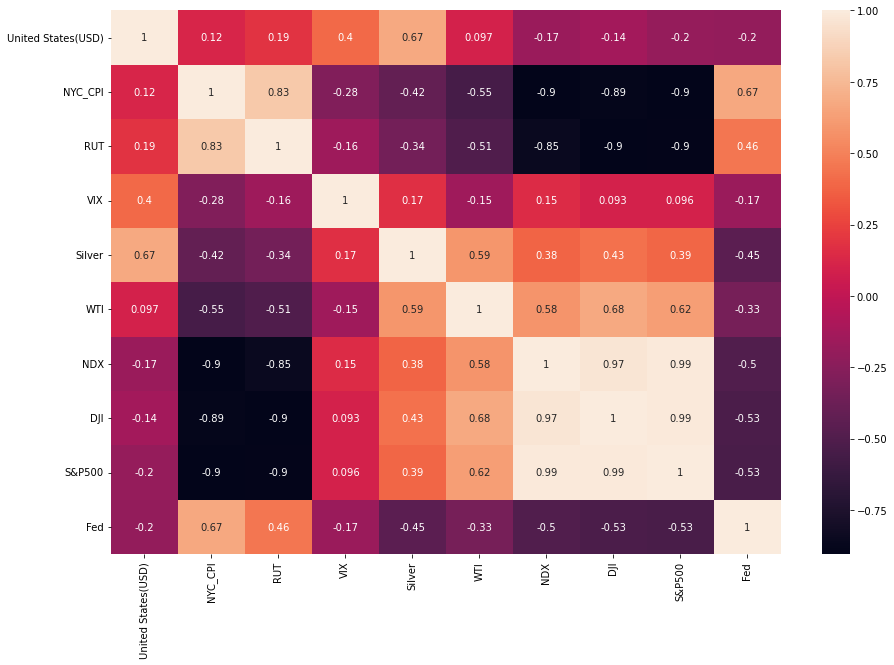

,United States(USD),NYC_CPI,RUT,VIX,Silver,WTI,NDX,DJI,S&P500,Fed
United States(USD),1.000000,0.116451,0.189014,0.403908,0.673915,0.097222,-0.169613,-0.136159,-0.195633,-0.199726
NYC_CPI,0.116451,1.000000,0.828157,-0.282791,-0.418116,-0.549619,-0.903174,-0.887216,-0.903818,0.667979
RUT,0.189014,0.828157,1.000000,-0.156108,-0.344222,-0.508182,-0.854289,-0.903667,-0.895867,0.456944
VIX,0.403908,-0.282791,-0.156108,1.000000,0.168470,-0.145951,0.149466,0.093269,0.095731,-0.171397
Silver,0.673915,-0.418116,-0.344222,0.168470,1.000000,0.587616,0.381487,0.434092,0.386703,-0.451240
WTI,0.097222,-0.549619,-0.508182,-0.145951,0.587616,1.000000,0.583472,0.675552,0.621650,-0.329659
NDX,-0.169613,-0.903174,-0.854289,0.149466,0.381487,0.583472,1.000000,0.966290,0.985396,-0.498794
DJI,-0.136159,-0.887216,-0.903667,0.093269,0.434092,0.675552,0.966290,1.000000,0.991982,-0.525102
S&P500,-0.195633,-0.903818,-0.895867,0.095731,0.386703,0.621650,0.985396,0.991982,1.000000,-0.533681
Fed,-0.199726,0.667979,0.456944,-0.171397,-0.451240,-0.329659,-0.498794,-0.525102,-0.533681,1.000000


In [66]:
plt.figure(figsize=(15,10))
sns.heatmap(gold_price_USD.corr(), annot=True)
plt.show()
gold_price_USD.corr()

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

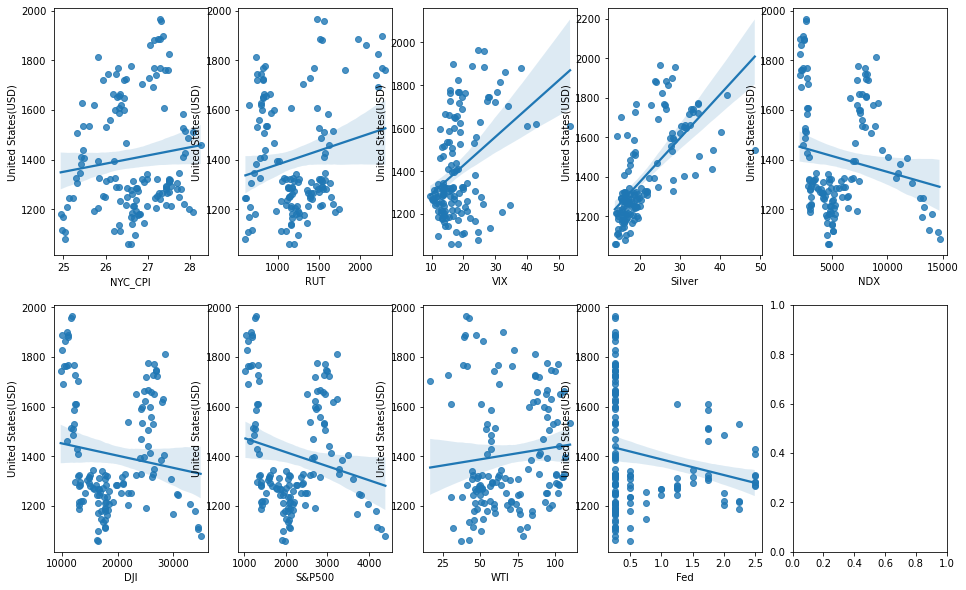

In [68]:
fig, axs = plt.subplots(figsize=(16,10), ncols=5, nrows=2)
lm_features = ["NYC_CPI", "RUT", "VIX", "Silver", "NDX", "DJI", "S&P500","WTI", "Fed"]
for i, feature in enumerate(lm_features):
    row = int(i/5)
    col = i%5
    sns.regplot(x=feature, y="United States(USD)", data=gold_price_USD, ax=axs[row][col])

### 정규화 작업

In [69]:
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
SS.fit(gold_price_USD)
s_gold_price_USD = SS.transform(gold_price_USD)

In [70]:
y = gold_price_USD["United States(USD)"]
X = gold_price_USD.drop(["United States(USD)"], axis =1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=1)
minmax_scaler = MinMaxScaler()
minmax_scaler = minmax_scaler.fit_transform(X)


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_preds = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)


print('MSE : {0:.3f}, RMSE : {1:3F}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))
      


3784.122968838634

In [71]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False, degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

# X_train.shape, X_train_poly.shape

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print(f"다항회귀 미적용 : {lr_model.score(X_train, y_train)}, {lr_model.score(X_test, y_test)}")


lr_model1 = LinearRegression()
lr_model1.fit(X_train_poly, y_train)
print(f"다항회귀 적용 : {lr_model1.score(X_train_poly, y_train)}, {lr_model1.score(X_test_poly, y_test)}")

다항회귀 미적용 : 0.9281288982257863, 0.9189610832256506
다항회귀 적용 : 0.9928916344611891, 0.9365665929698743


In [72]:
from sklearn.linear_model import Ridge, Lasso

Ri_model = Ridge()

Ri_model.fit(X_train, y_train)
print(f"릿지회귀 적용 : {Ri_model.score(X_train, y_train)}, {Ri_model.score(X_test, y_test)}")

La_model = Lasso()

La_model.fit(X_train, y_train)
print(f"라쏘회귀 적용 : {La_model.score(X_train, y_train)}, {La_model.score(X_test, y_test)}")

릿지회귀 적용 : 0.9269043916839752, 0.9195622996278324
라쏘회귀 적용 : 0.926894551599182, 0.9233660910068596


C:\Users\h_sl\.conda\envs\test\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.239e+05, tolerance: 5.333e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


C:\Users\h_sl\.conda\envs\test\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


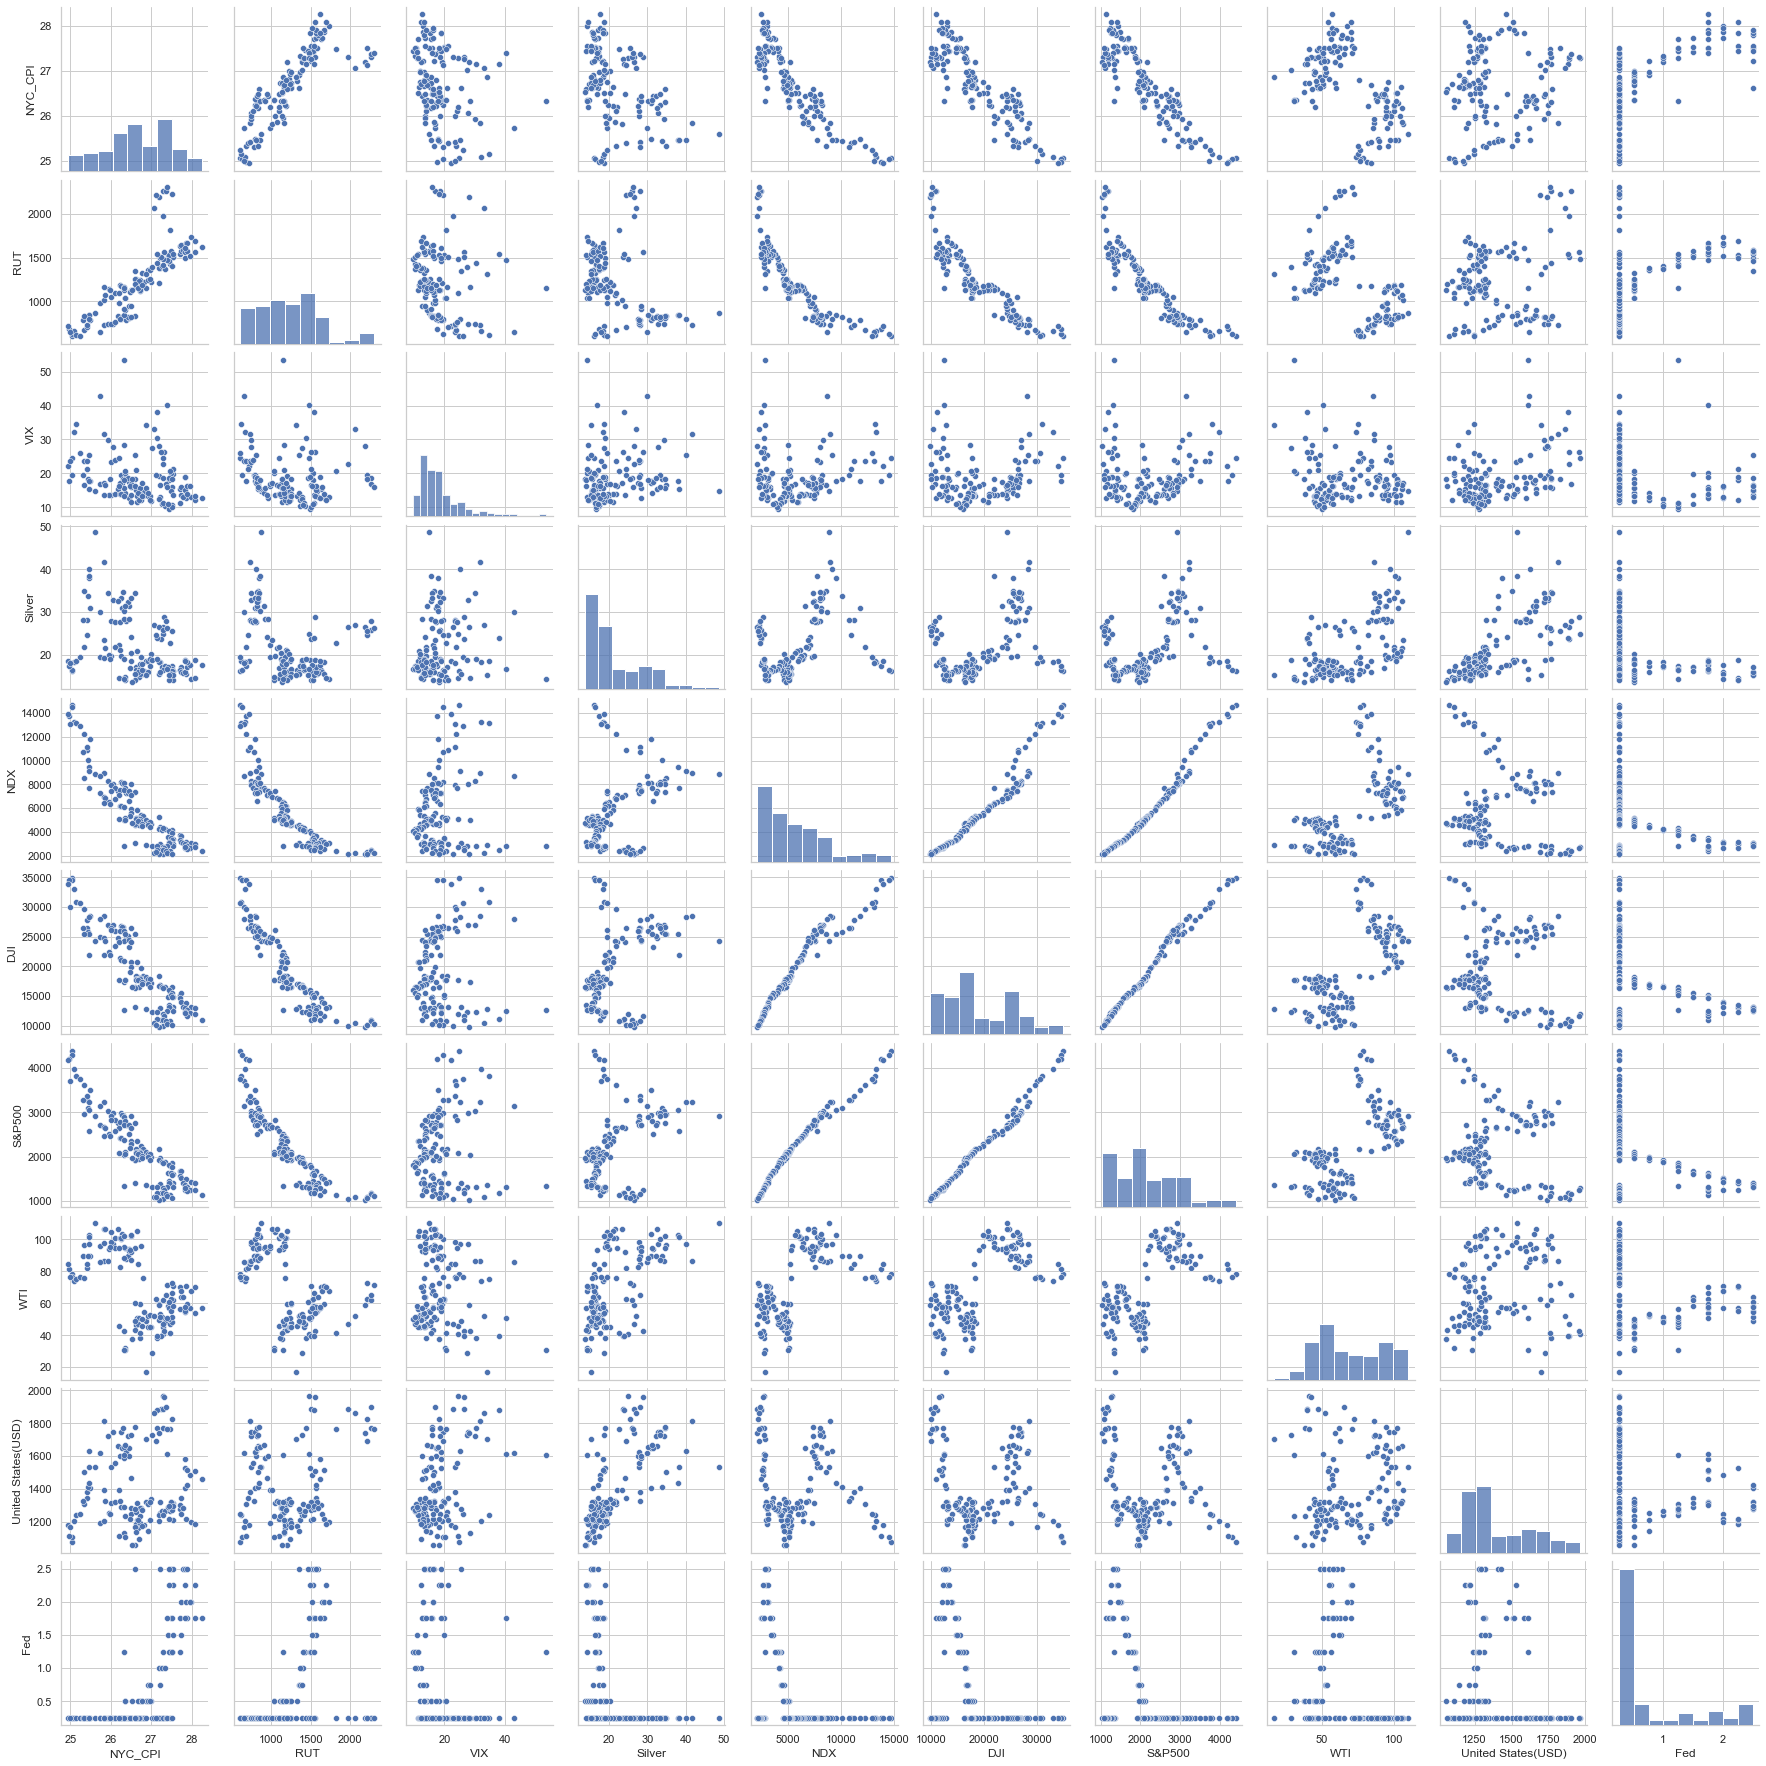

In [73]:
sns.set(style='whitegrid', context='notebook')
cols = ["NYC_CPI", "RUT", "VIX", "Silver", "NDX", "DJI", "S&P500","WTI", "United States(USD)", "Fed"]
sns.pairplot(gold_price_USD[cols], size=2.5)
plt.show()
sns.reset_orig()